In [20]:
import source.gprof_log_analysis.gprof_log as gplog
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
from pathlib import Path

dir = '../outgprof/'

sad_name, precise_name = os.listdir(dir)
sad = os.path.join(dir, sad_name)
precise = os.path.join(dir, precise_name)

files = [str(f) for f in Path(sad).rglob('*.txt')]

pattern = re.compile(r'^\.\.\\outgprof\\(.+)\\(.+)\\(.+)\\gprof_log\\log_(?:.+)_qp(\d{2})_(?:\w+)_gprof\.txt$')

temp = []
for file in files:
    check = pattern.findall(file)
    if len(check) > 0:
        temp.append(check[0])

files = [str(f) for f in Path(sad).rglob('*.txt')]
sad_data = {}
for file in files:
    check = pattern.findall(file)
    if len(check) > 0:
        _, video, cfg, qp = check[0]

        prec_path = f'..\outgprof\RdCost\{video}\{cfg}\gprof_log\log_{video}_qp{qp}_{cfg}_gprof.txt'
        if os.path.isfile(prec_path):
            tag = f'{video}_{cfg}_{qp}'
            sad_data[tag] = gplog.GprofDF(file, 10, specific_class=['RdCost']).loc[:,('class','name','time')]
            


In [23]:

def plot_execution_time(df : pd.DataFrame, name = None, cfg = None, qp = None, save : bool = False):
    title = ''
    if name != None and cfg != None and qp != None:
        title = f'{name} {cfg} - QP: {qp}'
    pd.Series(sad_data[tag]['time'], index = sad_data[tag]['name'], name='time').plot.barh(title = title)
    plt.subplots_adjust(left=0.25)
    plt.xlabel('execution time (%)')
    plt.style.use('ggplot')
    if save:
        plt.savefig(os.path.join('plot', tag)+'.jpeg')
    else:
        plt.show()

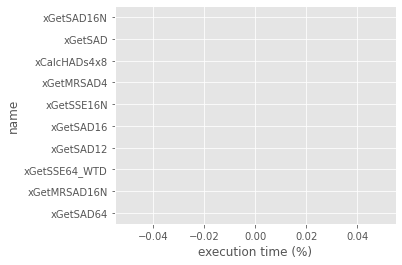

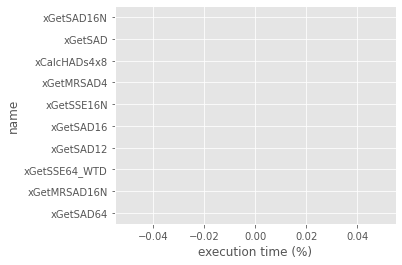

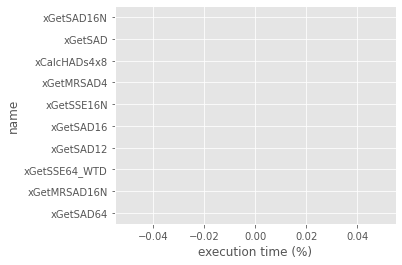

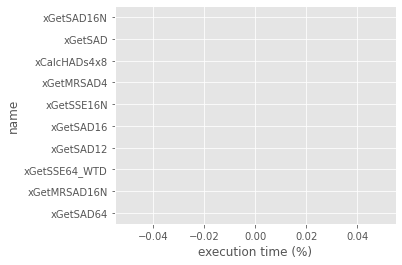

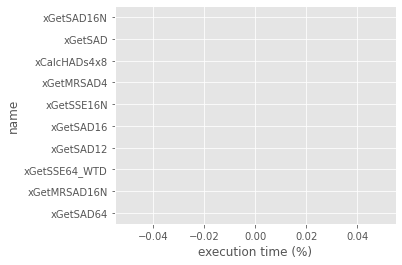

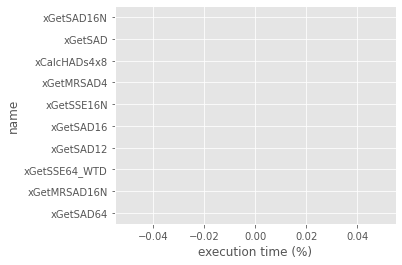

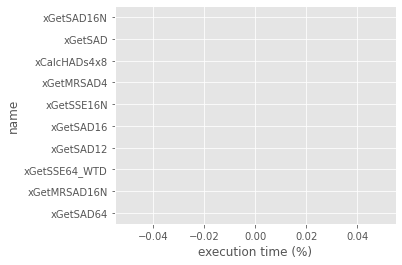

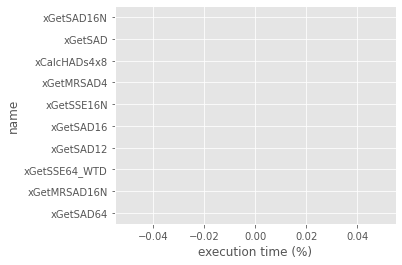

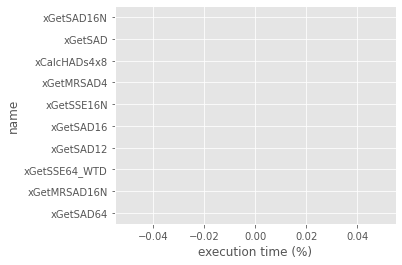

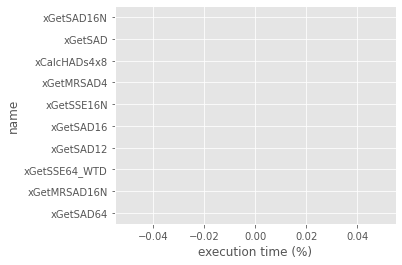

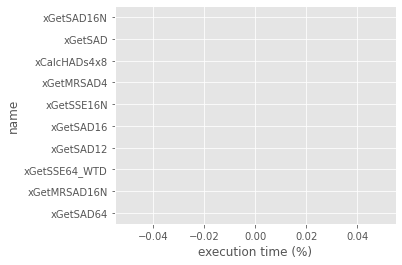

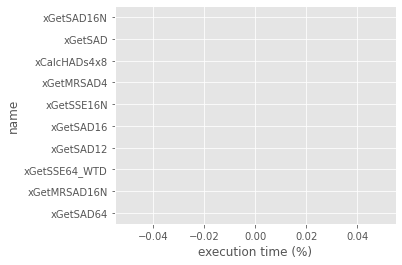

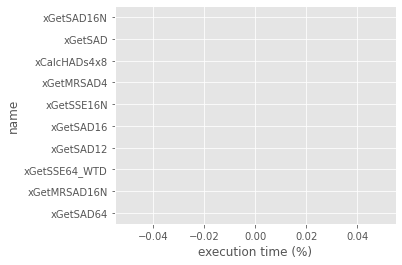

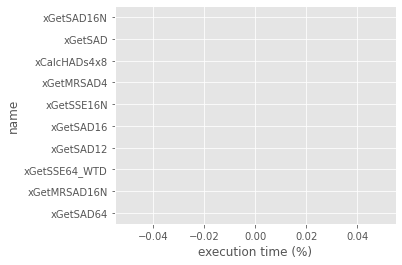

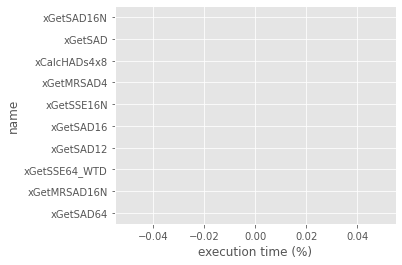

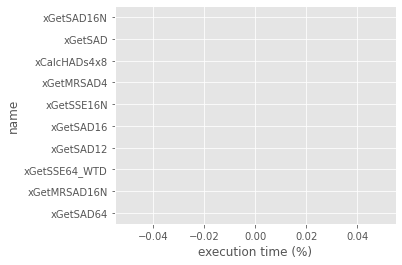

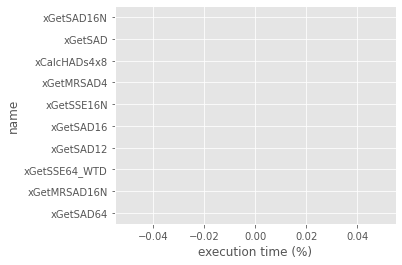

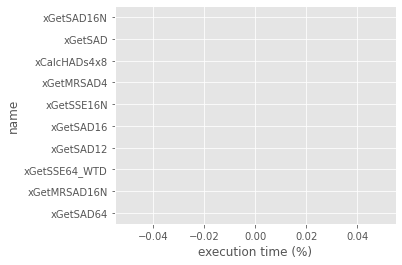

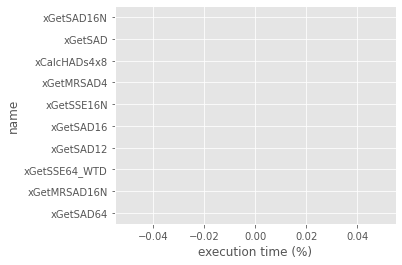

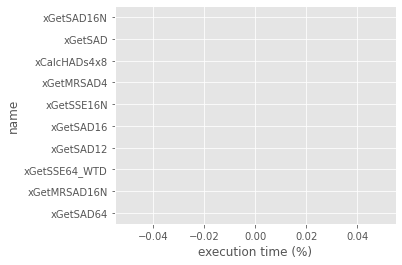

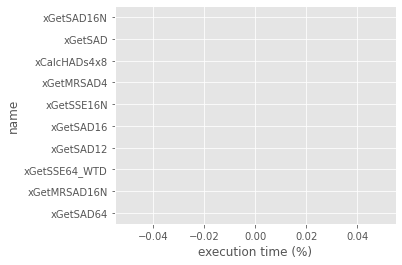

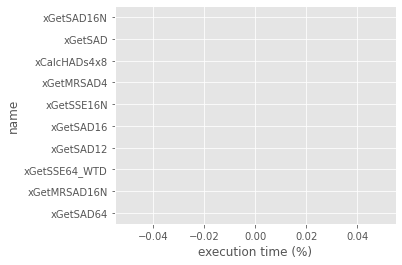

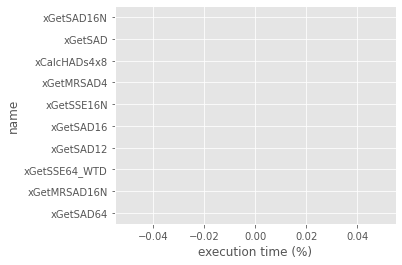

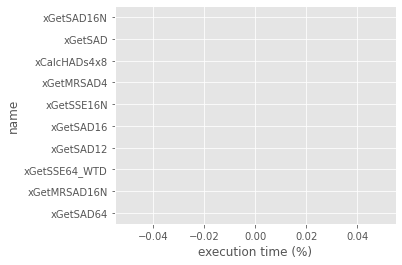

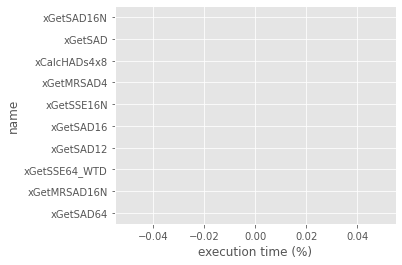

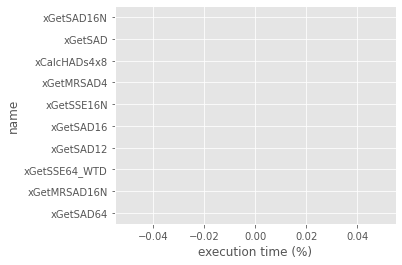

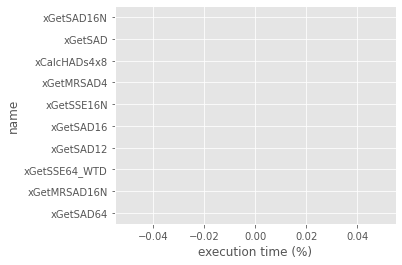

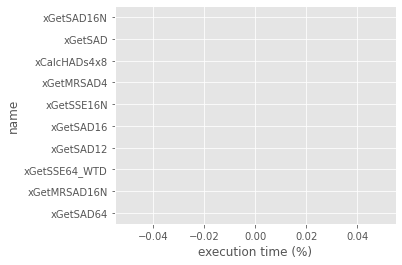

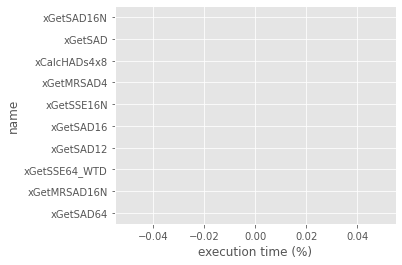

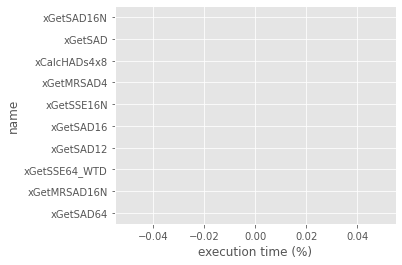

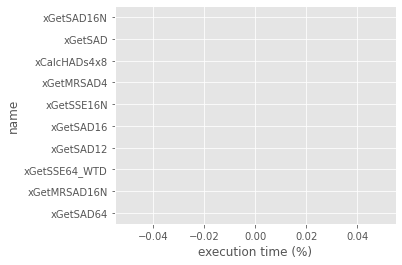

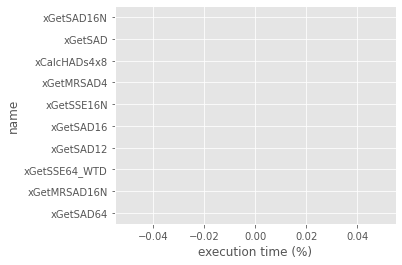

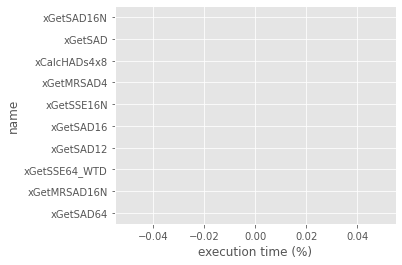

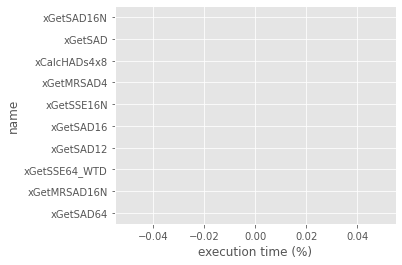

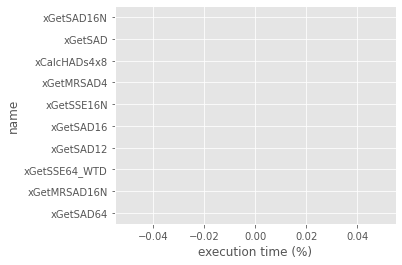

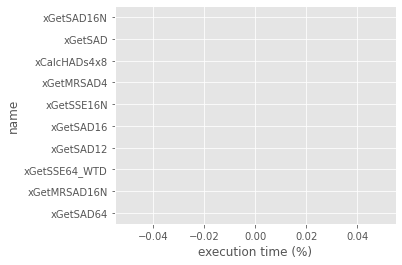

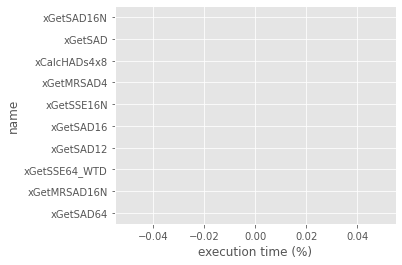

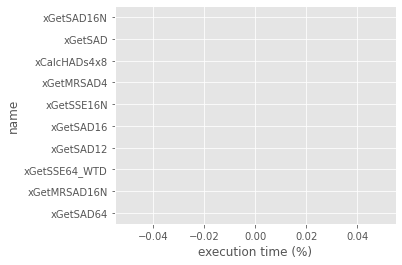

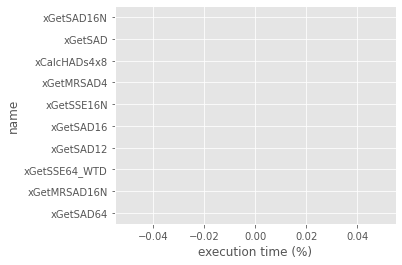

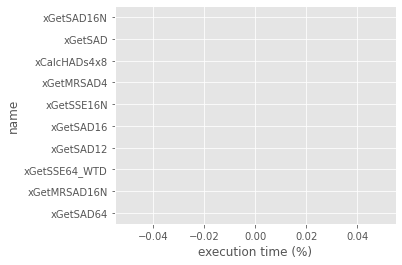

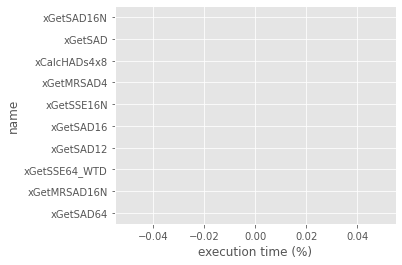

In [24]:

cfg_str = {'intra':'All Intra', 'randomaccess': 'Random Access', 'lowdelay': 'Low Delay'}
name_pattern = re.compile(r'^(.+)_(.+)_(\d{2})$')
for tag in sad_data.keys():
    name,cfg,qp = name_pattern.findall(tag)[0]
    cfg = cfg_str[cfg]

    plot_execution_time(sad_data[tag], save=False)
    
